<ipython-input-2-e187b2b66d01>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'-': 0, '+': 1}, inplace=True)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


                            OLS Regression Results                            
Dep. Variable:                    Std   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                 -0.343
Method:                 Least Squares   F-statistic:                    0.2340
Date:                Mon, 21 Oct 2024   Prob (F-statistic):              0.939
Time:                        00:17:27   Log-Likelihood:                -6.6872
No. Observations:                  16   AIC:                             25.37
Df Residuals:                      10   BIC:                             30.01
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0965      0.293      3.743      0.0

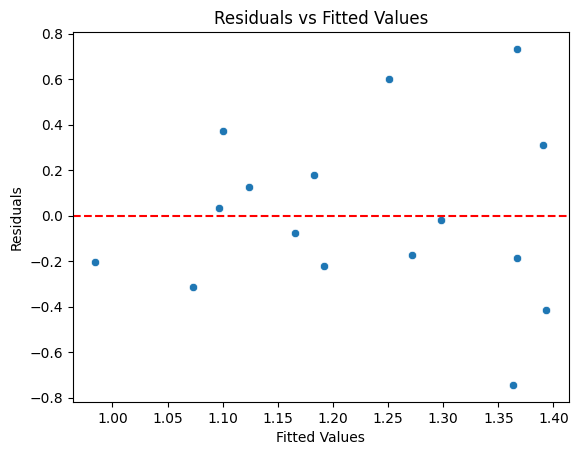

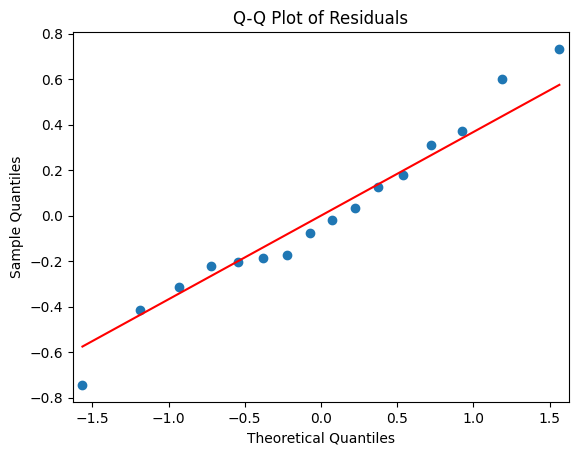

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


data = {
    'Order': range(1, 17),
    'A': ['-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+'],
    'B': ['-', '-', '+', '+', '-', '-', '+', '+', '-', '-', '+', '+', '+', '-', '-', '+'],
    'C': ['-', '-', '-', '-', '+', '+', '+', '+', '-', '-', '-', '-', '-', '+', '+', '+'],
    'D': ['-', '-', '-', '-', '-', '-', '-', '-', '+', '+', '+', '+', '+', '+', '+', '+'],
    'E': ['-', '+', '+', '-', '+', '-', '-', '+', '+', '-', '-', '-', '+', '-', '+', '+'], # Fixed: Reduced length to 16
    'Std': [1.13, 1.25, 0.97, 1.70, 1.47, 1.28, 1.18, 0.98, 0.78, 1.36, 1.85, 0.62, 1.09, 1.10, 0.76, 2.10]
}

df = pd.DataFrame(data)


df.replace({'-': 0, '+': 1}, inplace=True)


model = smf.ols('Std ~ A + B + C + D + E', data=df).fit()
print(model.summary())


residuals = model.resid
fitted = model.fittedvalues


sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [4]:
import pandas as pd
import numpy as np


data = {
    'Order': range(1, 17),
    'A': ['-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+', '-', '+'],
    'B': ['-', '-', '+', '+', '-', '-', '+', '+', '-', '-', '+', '+', '+', '-', '-', '+'],
    'C': ['-', '-', '-', '-', '+', '+', '+', '+', '-', '-', '-', '-', '-', '+', '+', '+'], # Fixed: Reduced length to 16
    'D': ['-', '-', '-', '-', '-', '-', '-', '-', '+', '+', '+', '+', '+', '+', '+', '+'],
    'E': ['-', '+', '+', '-', '+', '-', '-', '+', '+', '-', '-', '-', '+', '-', '+', '+'], # Fixed: Reduced length to 16
    'Std': [1.13, 1.25, 0.97, 1.70, 1.47, 1.28, 1.18, 0.98, 0.78, 1.36, 1.85, 0.62, 1.09, 1.10, 0.76, 2.10]
}

df = pd.DataFrame(data)


df.replace({'-': 0, '+': 1}, inplace=True)


effects = {}
for factor in ['A', 'B', 'C', 'D', 'E']:
    effects[factor] = df.groupby(factor)['Std'].mean()

print(effects)

{'A': A
0    1.15375
1    1.29875
Name: Std, dtype: float64, 'B': B
0    1.14125
1    1.31125
Name: Std, dtype: float64, 'C': C
0    1.194444
1    1.267143
Name: Std, dtype: float64, 'D': D
0    1.2450
1    1.2075
Name: Std, dtype: float64, 'E': E
0    1.2775
1    1.1750
Name: Std, dtype: float64}


<ipython-input-4-ff8ef8e81a65>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'-': 0, '+': 1}, inplace=True)
